In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### TPC-H

In [10]:
base_dir = "results_tpch"  

data = []

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file == "execution_times.txt":
            path_parts = root.split(os.sep)
            
            size_class = path_parts[-3]  
            sf = path_parts[-2]          
            query_number = path_parts[-1]  
            
            file_path = os.path.join(root, file)
            
            with open(file_path, 'r') as f:
                execution_times = f.readlines()
            
            for time in execution_times:
                data.append({
                    "Execution Time": float(time.strip()),
                    "Query Number": query_number,
                    "Scaling Factor (SF)": sf,
                    "Warehouse Size": size_class
                })

df = pd.DataFrame(data)


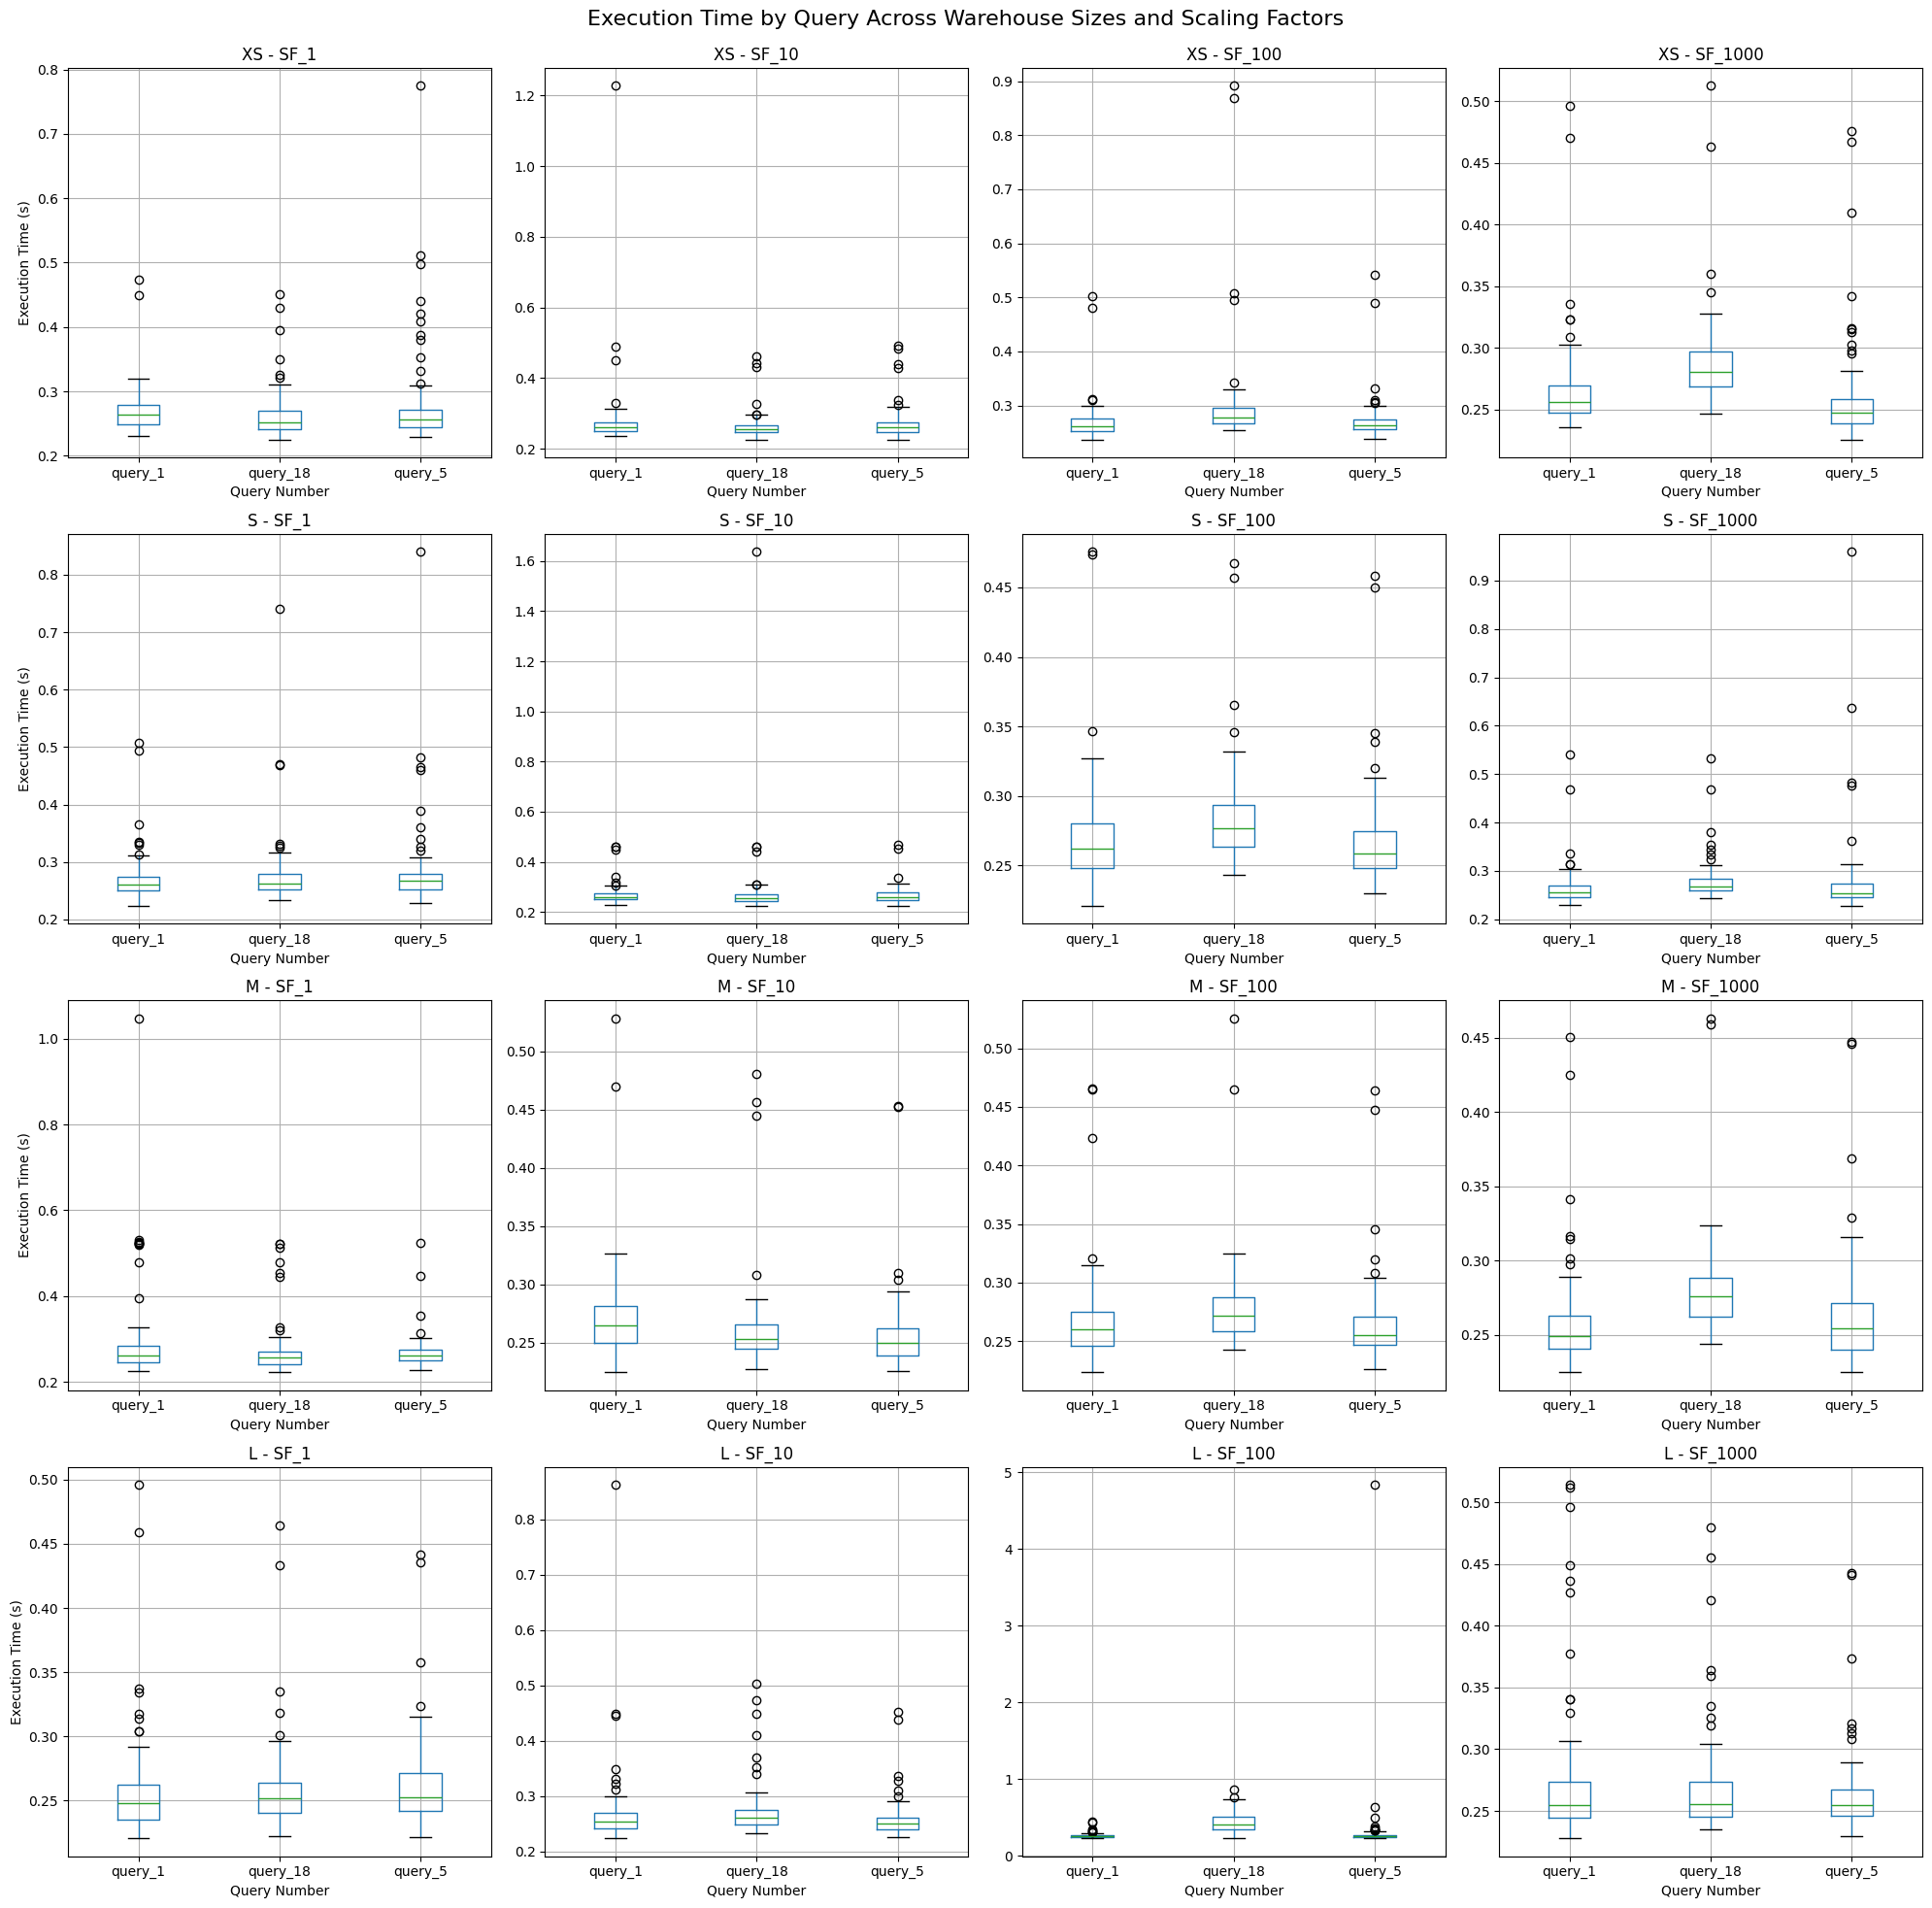

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=False)
sfls = ['SF_1', 'SF_10', 'SF_100', 'SF_1000']
size_classes = ['XS', 'S', 'M', 'L']

for row, size_class in enumerate(size_classes):
    for col, sf in enumerate(sfls):
        ax = axes[row, col]  
        
        subset = df[(df["Warehouse Size"] == size_class) & (df["Scaling Factor (SF)"] == sf)]
        
        if not subset.empty:
            subset.boxplot(
                by="Query Number",
                column="Execution Time",
                ax=ax,
                grid=True,
                patch_artist=False
            )
        
        ax.set_title(f"{size_class} - {sf}")
        if col == 0:
            ax.set_ylabel("Execution Time (s)")
        if row == len(size_classes) - 1:
            ax.set_xlabel("Query Number")

plt.suptitle("Execution Time by Query Across Warehouse Sizes and Scaling Factors", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)

plt.show()

In [12]:
summary_data = []

size_classes = ['XS', 'S', 'M', 'L']
sfls = ['SF_1', 'SF_10', 'SF_100', 'SF_1000']

for size_class in size_classes:
    for sf in sfls:
        subset_sf = df[(df["Warehouse Size"] == size_class) & (df["Scaling Factor (SF)"] == sf)]
        
        for query in subset_sf["Query Number"].unique():
            subset_query = subset_sf[subset_sf["Query Number"] == query]
            
            if not subset_query.empty:
                stats = subset_query["Execution Time"].describe()
                summary_data.append({
                    "Warehouse Size": size_class,
                    "Scaling Factor": sf,
                    "Query Number": query,
                    "Count": int(stats["count"]),
                    "Mean": round(stats["mean"], 2),
                    "Std Dev": round(stats["std"], 2),
                    "Min": round(stats["min"], 2),
                    "25%": round(stats["25%"], 2),
                    "50% (Median)": round(stats["50%"], 2),
                    "75%": round(stats["75%"], 2),
                    "Max": round(stats["max"], 2)
                })

summary_df = pd.DataFrame(summary_data)

summary_df.set_index(["Warehouse Size", "Scaling Factor", "Query Number"], inplace=True)

In [13]:
summary_df

Count  Mean  Std Dev   Min   25%  \
Warehouse Size Scaling Factor Query Number                                     
XS             SF_1           query_1         100  0.27     0.03  0.23  0.25   
                              query_5         100  0.28     0.07  0.23  0.24   
                              query_18        100  0.26     0.04  0.22  0.24   
               SF_10          query_1         100  0.28     0.10  0.24  0.25   
                              query_5         100  0.27     0.05  0.23  0.25   
                              query_18        100  0.26     0.04  0.23  0.25   
               SF_100         query_1         100  0.27     0.04  0.24  0.25   
                              query_5         100  0.27     0.04  0.24  0.26   
                              query_18        100  0.30     0.09  0.25  0.27   
               SF_1000        query_1         100  0.27     0.04  0.24  0.25   
                              query_5         100  0.26     0.04  0.23  0.24   
                              query_18        100  0.29     0.04  0.25  0.27   
S              SF_1           query_1         100  0.27     0.04  0.22  0.25   
                              query_5         100  0.28     0.07  0.23  0.25   
                              query_18        100  0.27     0.06  0.23  0.25   
               SF_10          query_1         100  0.27     0.04  0.23  0.25   
                              query_5         100  0.27     0.04  0.23  0.25   
                              query_18        100  0.28     0.14  0.22  0.24   
               SF_100         query_1         100  0.27     0.04  0.22  0.25   
                              query_5         100  0.27     0.04  0.23  0.25   
                              query_18        100  0.28     0.03  0.24  0.26   
               SF_1000        query_1         100  0.26     0.04  0.23  0.25   
                              query_5         100  0.27     0.09  0.23  0.25   
                              query_18        100  0.28     0.04  0.24  0.26   
M              SF_1           query_1         100  0.29     0.11  0.23  0.25   
                              query_5         100  0.27     0.04  0.23  0.25   
                              query_18        100  0.27     0.06  0.22  0.24   
               SF_10          query_1         100  0.27     0.04  0.22  0.25   
                              query_5         100  0.26     0.03  0.23  0.24   
                              query_18        100  0.26     0.04  0.23  0.24   
               SF_100         query_1         100  0.27     0.04  0.22  0.25   
                              query_5         100  0.26     0.03  0.23  0.25   
                              query_18        100  0.28     0.04  0.24  0.26   
               SF_1000        query_1         100  0.26     0.03  0.22  0.24   
                              query_5         100  0.26     0.04  0.22  0.24   
                              query_18        100  0.28     0.03  0.24  0.26   
L              SF_1           query_1         100  0.26     0.04  0.22  0.23   
                              query_5         100  0.26     0.03  0.22  0.24   
                              query_18        100  0.26     0.03  0.22  0.24   
               SF_10          query_1         100  0.27     0.07  0.22  0.24   
                              query_5         100  0.26     0.03  0.22  0.24   
                              query_18        100  0.27     0.04  0.23  0.25   
               SF_100         query_1         100  0.26     0.03  0.23  0.24   
                              query_5         100  0.31     0.46  0.22  0.24   
                              query_18        100  0.43     0.13  0.23  0.34   
               SF_1000        query_1         100  0.27     0.06  0.23  0.24   
                              query_5         100  0.26     0.03  0.23  0.25   
                              query_18        100  0.27     0.04  0.23  0.25   

                                           

### Implementations

In [14]:
python_results = pd.read_csv(
    'implementations/results/Python/execution_times.txt', 
    names=['execution_time'], 
    header=None  
)

In [15]:
sql_results = pd.read_csv(
    'implementations/results/SQL/execution_times.txt', 
    names=['execution_time'], 
    header=None  
)

In [16]:
sql_queries_results = pd.read_json(
    'implementations/results/SQL/per_query_times.json', 
)

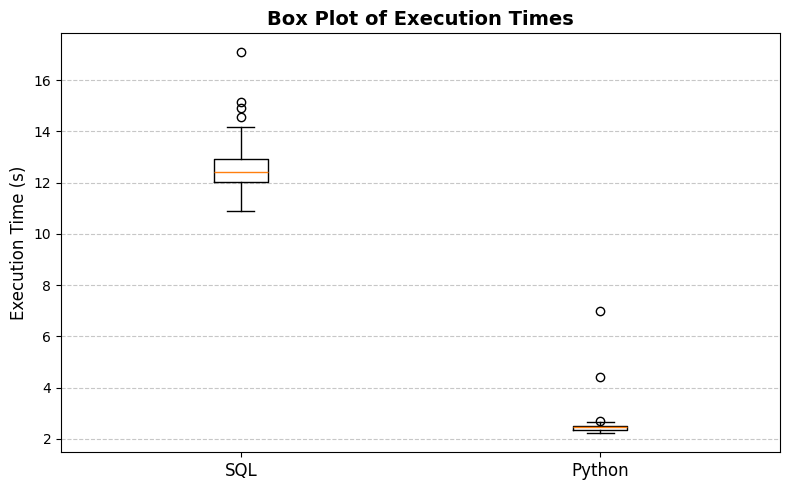

In [17]:
data = [sql_results['execution_time'], python_results['execution_time']]

plt.figure(figsize=(8, 5))
plt.boxplot(data)

plt.xticks([1, 2], ['SQL', 'Python'], fontsize=12)
plt.title('Box Plot of Execution Times', fontsize=14, fontweight='bold')
plt.ylabel('Execution Time (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

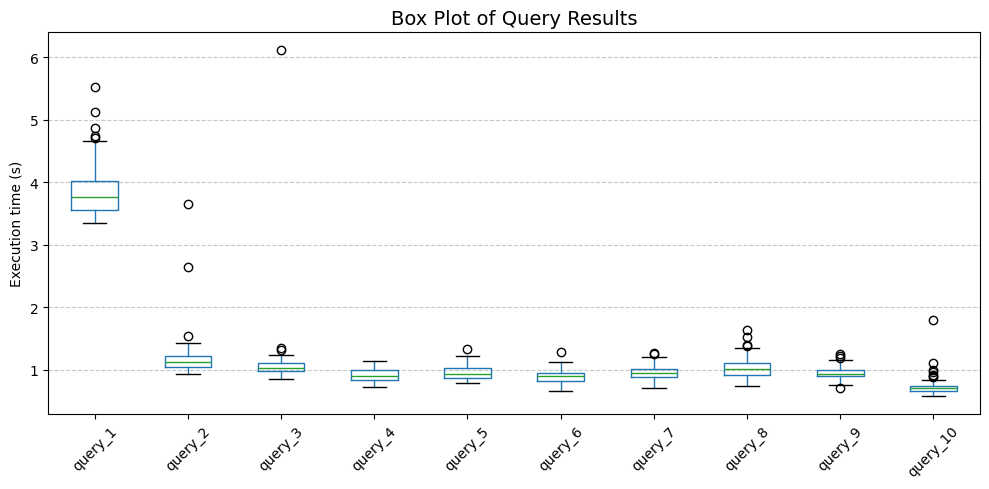

In [18]:
plt.figure(figsize=(10, 5))
sql_queries_results.boxplot(grid=False)

plt.title('Box Plot of Query Results', fontsize=14)
plt.ylabel('Execution time (s)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
